# Step-1

## Problem Statement
- We are given a dataset which consists of monthly totals of international airline passengers, between 1949 to 1960. The objective of this analysis and modeling is to review time series theory.We will be following an ARIMA modeling procedure of the AirPassengers dataset as follows:
1. Perform exploratory data analysis
2. Decomposition of data
3. Test the stationarity

# Step-2

Now We will using Air Passenger dataset to:
1. Fit the model using ARIMA Algorithm
2. Calculates Forecast
    - Forecasting a Time Series:  we will use statistical modeling method called ARIMA to forecast the data where there are dependencies in the values.To find out the p and q values for the model, we will use ACF and PACF Plots.

In [2]:
# Import the required Liabraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

import warnings
warnings.filterwarnings('ignore')

C:\Users\navee\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\navee\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
# Load the datset
df = pd.read_csv(r"C:\Users\navee\OneDrive\Desktop\Simplilearn\Machine Learning\dataset\AirPassengers.csv")

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
# Info shows dataset consist of 2 column, date and montly passenger and its count and also data has no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
# Display the few rows of Month column 
df["Month"].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [7]:
# Lets display the total monthly passenger count using the lambda function to fillter Month
df["Month"] = df["Month"].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))

# Setting index to month 
df = df.set_index("Month")
df.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [8]:
# Assigning the passenges data in ts variable
ts = df['#Passengers']

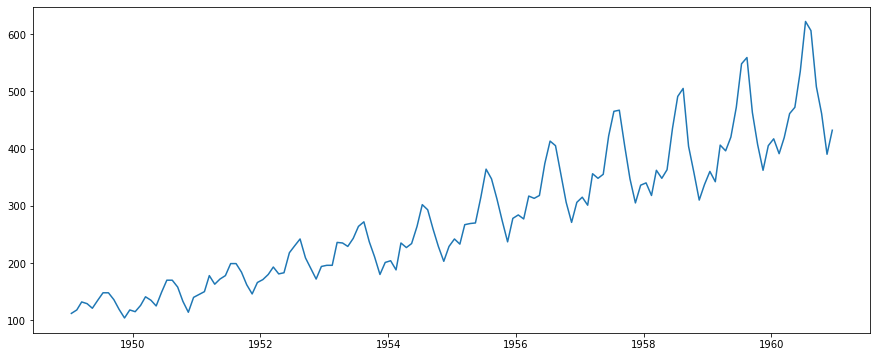

In [9]:
# Plotting the time series
plt.plot(ts)

- It's clear from the plot that there is an overall increase in the trend with some seasonality init.

In [10]:
# Transforming the series using log D composition station stationarity check.
ts_log = np.log(ts)

In [11]:
# Stationarity function, I will be writing functions for performing rolling statistics and Dickey Fuller test
def test_stationarity(timeseries):
    #Lets Determine the rolling statistics, So calculating the rolling mean
    rolmean = timeseries.rolling (window=52, center=False).mean()
    # Calculating the roller standard deviation
    rolstd = timeseries.rolling (window=52, center=False).std()
    
    orig= plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend (loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Let's Perform the Dickey Fuller Test
    print('Results of Dickey-Fuller Test:')
    
    # Intialize the df_test variable
    dftest = adfuller (timeseries, autolag='AIC')
    
    # Initalize the output with test statistics and p value and other required variable
    df_output = pd.Series(dftest [0:4], index= ['Test Statistic', 'p-value', '#Lags Used',
                                               'Number of Observations Used'])
    
    # Intializing the critical value variable use a for loop to print df_output values
    for key, value in dftest[4].items():
        df_output["Critical Values (%s)" %key] = value
    print(df_output)
        
    

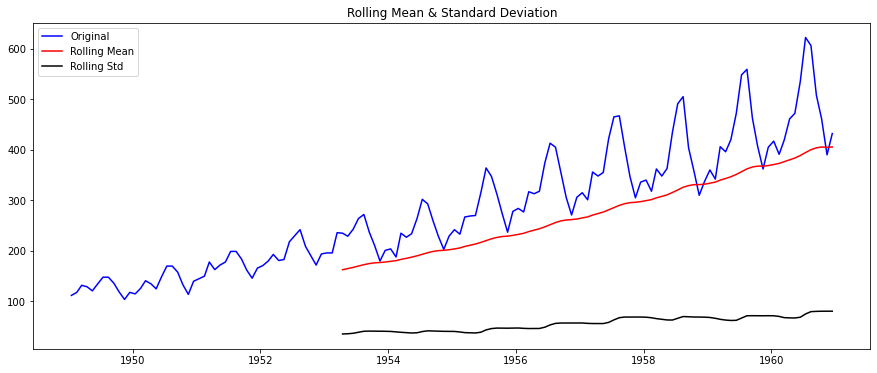

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Values (1%)            -3.481682
Critical Values (5%)            -2.884042
Critical Values (10%)           -2.578770
dtype: float64


In [12]:
# Now lets apply the data to the function and see the results for stationarity
test_stationarity(df["#Passengers"])

- By observing the plot and result of the Dickey fullaer test, we infer the test statistics is more than critical value and the moving averages is not constant overtime, So the null hypothesis of the Dickey fuller test can not be rejected because (test statistics is > criticl value). This shows that the time series is not stationary decomposing the data.

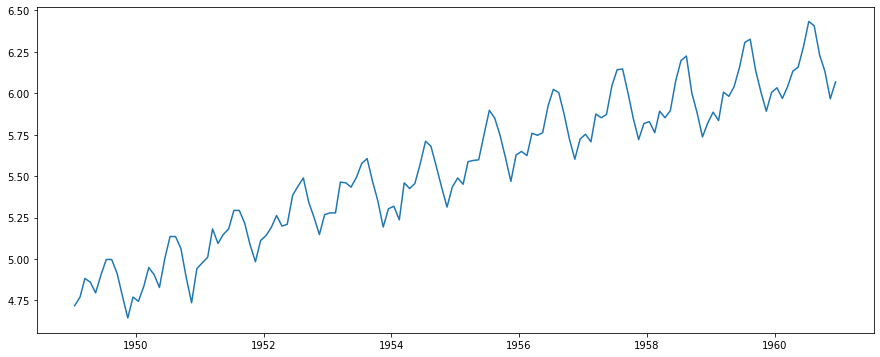

In [13]:
# Plot the moving averages
plt.plot(ts_log)

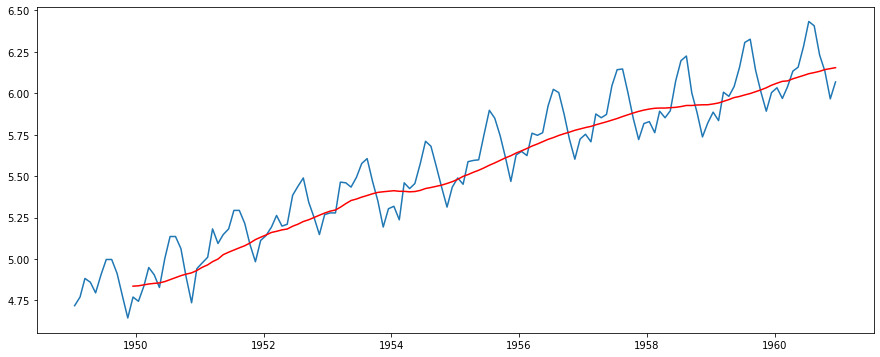

In [14]:
# Intialize the moving averages and moving STD variale
moving_averages = ts_log.rolling(window=12).mean()
moving_STD = ts_log.rolling(window=12).std()

# Plotting the data
plt.plot(ts_log)

#plotting the moving average
plt.plot(moving_averages,color='red')

In [15]:
#Lets write the code for the same
ts_log_mv_diff = ts_log - moving_averages
ts_log_mv_diff.head(12)

# Drop the null values 
ts_log_mv_diff.dropna(inplace=True)

# printing the first twelve values
ts_log_mv_diff.head(12)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
1950-10-15   -0.018578
1950-11-15   -0.180379
Name: #Passengers, dtype: float64

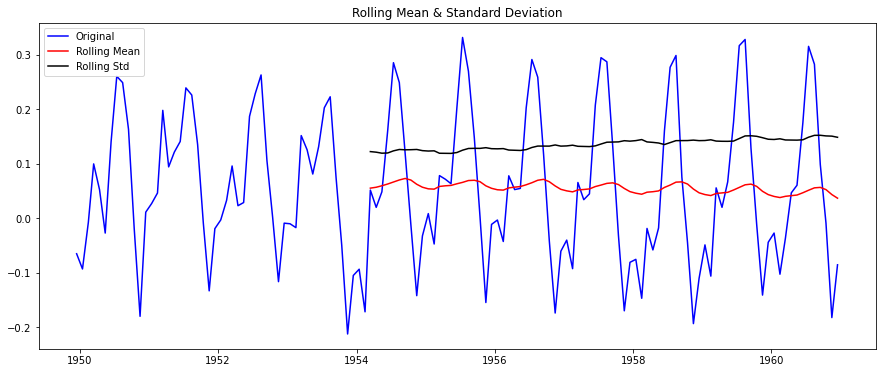

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Values (1%)            -3.486535
Critical Values (5%)            -2.886151
Critical Values (10%)           -2.579896
dtype: float64


In [16]:
# Now Let's parse our time series data into this function and check for stationarity
test_stationarity(ts_log_mv_diff)

- The result of the Dickey fuller test show that the test statistics is less than 1% of critical value that tell us that we are 99% confident that this series is stationary, we can reject the null hypothesis   

# Step-2

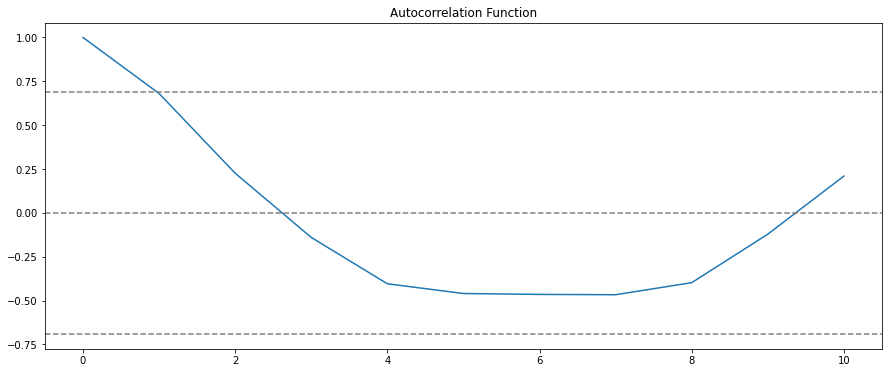

In [17]:
# Plotting the ACF, Intialize the plot and applying ACF, calculating the axes
plt.plot(np.arange(0,11),acf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title("Autocorrelation Function")
plt.show()

- The ACF Curve crosses the upper confidence value when the leg value is between 0 and 1, thus the optimal value of q and ARIMA model must be 0 or 1

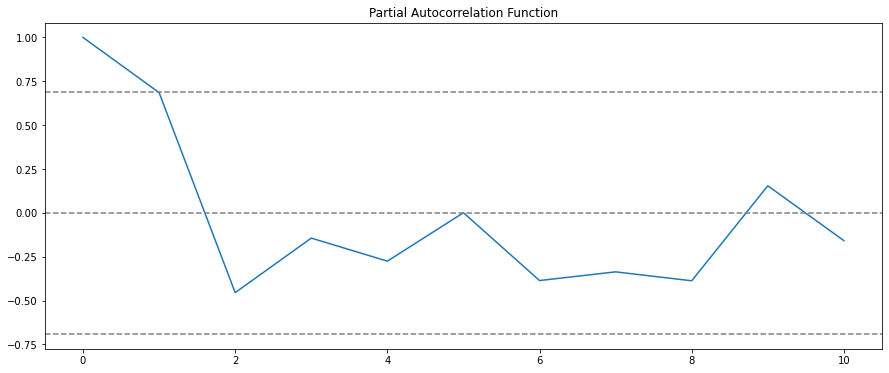

In [18]:
# Plotting the PACF, Intialize the plot and applying PACF, calculating the axes
plt.plot(np.arange(0,11),pacf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title("Partial Autocorrelation Function")
plt.show()

- The PACF Curve drop to 0 between leg values 1 and 2, thus the optimal value of p in the  ARIMA model is 1 or 2.pi

Text(0.5, 1.0, 'RSS : nan')

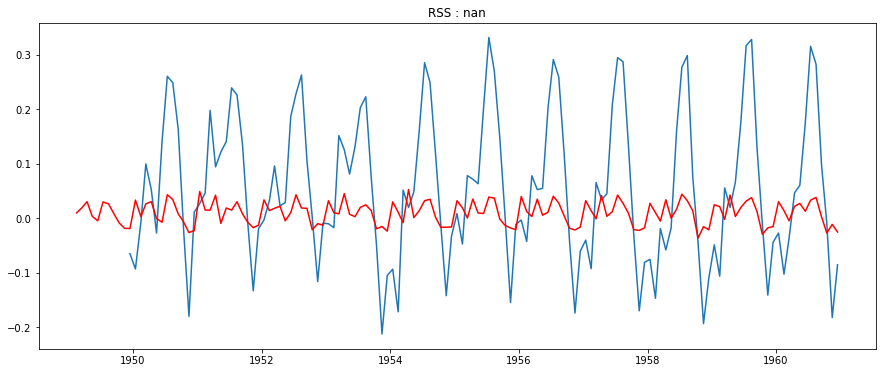

In [19]:
model_ARIMA = ARIMA(ts_log,order=(1,1,0))
results_ARIMA = model_ARIMA.fit(disp=-1)
plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS : %.4f'% sum((results_ARIMA.fittedvalues[1:]-ts_log_mv_diff)**2))

## Model Prediction

In [20]:
# First Step, Store the predicted result as a seprate series 
pred_ARIMA_Diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
pred_ARIMA_Diff.head()

Month
1949-02-15    0.009676
1949-03-15    0.018164
1949-04-15    0.030130
1949-05-15    0.003154
1949-06-15   -0.005039
dtype: float64

- Observe it & notice that these start from 1949-02-15, not the first month, this is because we took a lag by one and the first elemrnt doesn't have anything before to substract from, 
- the way to convert the differences to log scale is to add these differences consecutively to the base number and eaiser way to do it, it is to first determine the cumulative sum at index and then add it to the base number

In [21]:
pred_ARIMA_Diff_cumsum = pred_ARIMA_Diff.cumsum()
pred_ARIMA_Diff_cumsum.head()

Month
1949-02-15    0.009676
1949-03-15    0.027839
1949-04-15    0.057969
1949-05-15    0.061123
1949-06-15    0.056084
dtype: float64

- The Cumulative sum can be found and quickly do some calculations using the previous output to check if there sre correct
- Next we add them to the base number for this, Let's create a series with all values as the base number and add the differences to it 


In [22]:
pred_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
pred_ARIMA_log = pred_ARIMA_log.add(pred_ARIMA_Diff_cumsum,fill_value=0)
pred_ARIMA_log.head()

Month
1949-01-15    4.718499
1949-02-15    4.728175
1949-03-15    4.746338
1949-04-15    4.776468
1949-05-15    4.779622
dtype: float64

'''And Finally we have the forecast on the orignal scale, intializing ARIMA model plotting the ARIMA predictions 
assigning RMSE value as the plot title.'''
predictions_ARIMA = np.exp(pred_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title("RMSE : %.4f" % np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

- The orange curve is our prediction which has RMSE of 52.1841, while our model is good at predicting the trend, it fails in capturing the seasonality 

## ___Summary Table___

### Step-1 : Import Liabraries and Dataset
### Step-2 : Perform Exploratory Data Analysis 
### Step-3 : Perform Decomposition of data 
### Step-4 : Perform Stationarity Check
### Step-5 : Fit a model using ARIMA Algorithm
### Step-6 :Calculate Forecast

